In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


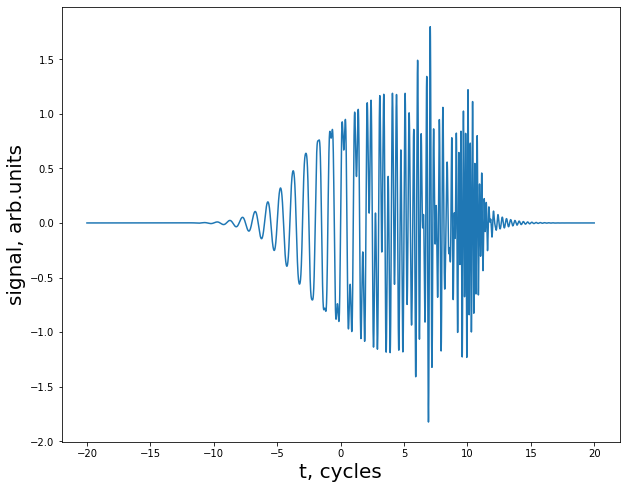

In [3]:
# generate the signal
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 2**14)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
# add the 4th wave packet:
y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)
figure(figsize=(10,8))
plt.plot(t/2/pi,y)

xlabel('t, cycles',fontsize = 20)
ylabel('signal, arb.units',fontsize = 20)
show()

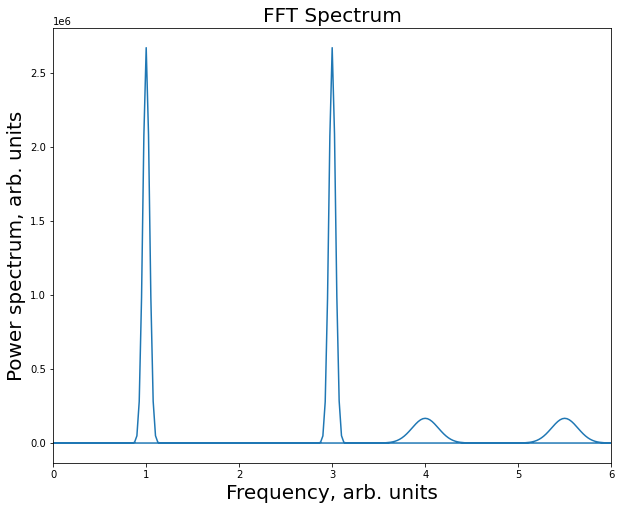

In [4]:
# Fourier spectrum
sp=fft.fft(y)
w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
figure(figsize=(10,8))
plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units',fontsize = 20)
ylabel('Power spectrum, arb. units',fontsize = 20)
title("FFT Spectrum",fontsize = 20);
show()

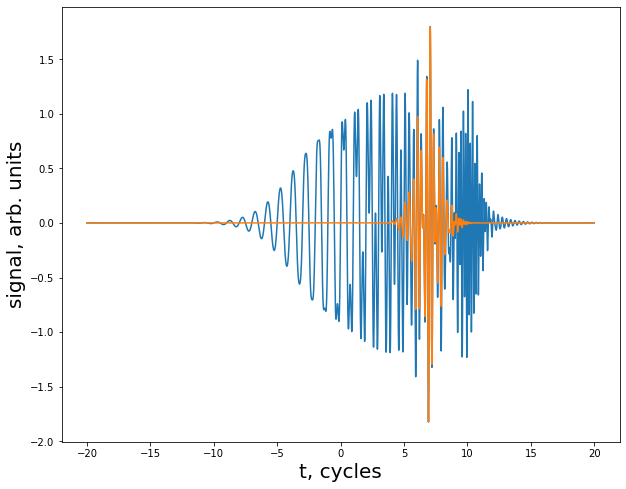

In [5]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=1*2*pi
window_position=7.0*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function
figure(figsize=(10,8))
plot(t/2/pi, y)
plot(t/2/pi, y_window)
xlabel("t, cycles",fontsize = 20)
ylabel("signal, arb. units",fontsize = 20)
show()

In [6]:
# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum

In [7]:
def get_spectrogram(nwindowsteps):
  t_window=linspace(-20*2*pi, 20*2*pi, nwindowsteps) #time
  window_width=2.0*2*pi
  spectrogram=np.empty([len(t), len(t_window)])

  for n,t_w in enumerate(t_window):
    window_position=t_w
    window_function=exp(-(t-window_position)**2/2/window_width**2)
    y_window=y*window_function
    sp = fft.fft(y_window)
    spectrogram[:,n]=abs(sp)
  return spectrogram

In [8]:
# plot spectrogram, explain what you see

In [12]:
def show_spectrogram(nwindowsteps):
  figure(figsize=(10,8))
  imshow(get_spectrogram(nwindowsteps), aspect='auto', origin='lower', extent=[min(t)/2/pi, max(t)/2/pi,w[0], 2*w[int(len(w)/2)-1]])

  colorbar()
  ylim(0,10)
  xticks(fontsize = 20)
  yticks(fontsize = 20)
  xlabel('Time, cycles',fontsize = 20)
  ylabel('Frequency',fontsize = 20)
  title('Spectrogram, color corresponds to power spectrum \n',fontsize = 20)
  show()

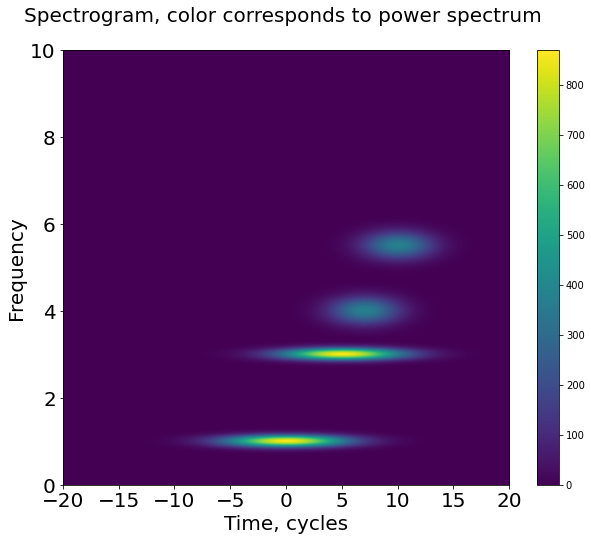

In [13]:
show_spectrogram(1000)

We see 4 signal areas  which are located at (0,1) , (5,3), (7, 4) and (10, 5.5) where (x,y): x = time shift  and y = frequency

3. Change the number of time steps in your signal to the power of 2 (i.e. 2\*\*14) and then slightly change the number of timesteps (i.e 2\*\*14 +- 5). Measure the timing, can you explain the difference? Write something as a possible explanation.

In [14]:
nwindowsteps = 1000
t_window=linspace(-20*2*pi, 20*2*pi, nwindowsteps) #time
window_width=2.0*2*pi
spectrogram=np.empty([len(t), len(t_window)])

timestep = $2^{14}+5$

In [15]:
#timestep = 2**14
t=np.linspace(-20*2*pi, 20*2*pi, 2**14)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
# add the 4th wave packet:
y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)

In [16]:
%%timeit -n 100 -r 1
get_spectrogram(1000)

100 loops, best of 1: 1.09 s per loop


In [17]:
n,t_w = list(enumerate(t_window))[0]
window_position=t_w
window_function=exp(-(t-window_position)**2/2/window_width**2)
y_window=y*window_function
sp = fft.fft(y_window)
spectrogram[:,n]=abs(sp)

timeit for every line of loop:

In [18]:
%%timeit -n 100 -r 1
n,t_w = list(enumerate(t_window))[0]

100 loops, best of 1: 127 µs per loop


In [19]:
%%timeit -n 100 -r 1
window_position=t_w

100 loops, best of 1: 70 ns per loop


In [20]:
%%timeit -n 100 -r 1
window_function=exp(-(t-window_position)**2/2/window_width**2)

100 loops, best of 1: 409 µs per loop


In [21]:
%%timeit -n 100 -r 1
y_window=y*window_function

100 loops, best of 1: 11.8 µs per loop


In [22]:
%%timeit -n 100 -r 1
sp = fft.fft(y_window)

100 loops, best of 1: 353 µs per loop


In [23]:
%%timeit -n 100 -r 1
spectrogram[:,n]=abs(sp)

100 loops, best of 1: 272 µs per loop


timestep = $2^{14}+5$

In [24]:
#timestep = 2**14+5
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+5)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
# add the 4th wave packet:
y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)

In [28]:
nwindowsteps = 1000
t_window=linspace(-20*2*pi, 20*2*pi, nwindowsteps) #time
window_width=2.0*2*pi
spectrogram=np.empty([len(t), len(t_window)])

In [25]:
%%timeit -n 100 -r 1
get_spectrogram(1000)

100 loops, best of 1: 3.27 s per loop


In [29]:
n,t_w = list(enumerate(t_window))[0]
window_position=t_w
window_function=exp(-(t-window_position)**2/2/window_width**2)
y_window=y*window_function
sp = fft.fft(y_window)
spectrogram[:,n]=abs(sp)

In [30]:
shape(spectrogram)

(16389, 1000)

timeit for every line of loop:

In [31]:
%%timeit -n 100 -r 1
n,t_w = list(enumerate(t_window))[0]

100 loops, best of 1: 167 µs per loop


In [32]:
%%timeit -n 100 -r 1
window_position=t_w

100 loops, best of 1: 79.8 ns per loop


In [33]:
%%timeit -n 100 -r 1
window_function=exp(-(t-window_position)**2/2/window_width**2)

100 loops, best of 1: 396 µs per loop


In [34]:
%%timeit -n 100 -r 1
y_window=y*window_function

100 loops, best of 1: 15 µs per loop


In [35]:
%%timeit -n 100 -r 1
sp = fft.fft(y_window)

100 loops, best of 1: 2.58 ms per loop


In [36]:
%%timeit -n 100 -r 1
spectrogram[:,n]=abs(sp)

100 loops, best of 1: 275 µs per loop


The difference in times (1.38s vs 3.62s) mostly depends on the line of code "sp = fft.fft(y_window)": 0.366 ms vs 2.52 ms which means that function fft.fft works slower for arrays with length not equal to $2^p$ 